In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

## 1. Cities

In [2]:
top_cities = ["Mont Saint Michel",
"St Malo",
"Bayeux",
"Le Havre",
"Rouen",
"Paris",
"Amiens",
"Lille",
"Strasbourg",
"Chateau du Haut Koenigsbourg",
"Colmar",
"Eguisheim",
"Besancon",
"Dijon",
"Annecy",
"Grenoble",
"Lyon",
"Gorges du Verdon",
"Bormes les Mimosas",
"Cassis",
"Marseille",
"Aix en Provence",
"Avignon",
"Uzes",
"Nimes",
"Aigues Mortes",
"Saintes Maries de la mer",
"Collioure",
"Carcassonne",
"Ariege",
"Toulouse",
"Montauban",
"Biarritz",
"Bayonne",
"La Rochelle"]

This is the list of the 35 most beautiful cities in France

In [3]:
df = pd.DataFrame(data=top_cities,columns=['cities'])
df.head()

,cities
0,Mont Saint Michel
1,St Malo
2,Bayeux
3,Le Havre
4,Rouen


Getting coordinates

In [4]:
from geopy.geocoders import Nominatim

# initialize Nominatim
geolocator = Nominatim(user_agent='my_geocoder')

for index, row in df.iterrows():
    city = row["cities"]
    location = geolocator.geocode(city)
    if location is not None:
        df.at[index, "latitude"] = location.latitude
        df.at[index, "longitude"] = location.longitude
    else:
        print(f"Impossible de géocoder la ville : {city}")

In [5]:
df.head()

,cities,latitude,longitude
0,Mont Saint Michel,48.635954,-1.511460
1,St Malo,48.649518,-2.026041
2,Bayeux,49.276462,-0.702474
3,Le Havre,49.493898,0.107973
4,Rouen,49.440459,1.093966


In [6]:
df.isna().sum()

cities       0
latitude     0
longitude    0
dtype: int64

## 2. Weather

Using openweathermap API to get weather forecast for the next 7 days in our 35 cities

In [7]:
import requests

api_key = "*********"

def get_weather(latitude, longitude):
    url = f"https://api.openweathermap.org/data/2.5/onecall?lat={latitude}&lon={longitude}&exclude=current,minutely,hourly,alerts&units=metric&lang=fr&appid={api_key}"
    response = requests.get(url)
    data = response.json()
    return data

In [8]:
weather_data = []

for index,row in df.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    
    data = get_weather(latitude, longitude)
    
    for daily in data["daily"]:
        weather_data.append({
            "Cities": row['cities'],
            "Date": pd.to_datetime(daily["dt"], unit="s"),
            "Temperature": daily["temp"]["day"],
            "Humidity": daily["humidity"],
            "Wind_speed": daily["wind_speed"],
            "Description": daily["weather"][0]["description"],
            "Rain_probability": daily.get("pop", None),
            "Rain_quantity": daily.get("rain", None)
        })


I choose to keep only the informations I estimate necessary, temperature, humidity, wind_speed, description, rain_probability and rain_quantity are for me the best indicator to know if the weather will be good or not.

In [10]:
df_weather = pd.DataFrame(weather_data)

df_weather

,Cities,Date,Temperature,Humidity,Wind_speed,Description,Rain_probability,Rain_quantity
0,Mont Saint Michel,2023-08-24 12:00:00,23.07,70,7.39,pluie modérée,0.91,4.60
1,Mont Saint Michel,2023-08-25 12:00:00,19.77,55,6.36,partiellement nuageux,0.00,NaN
2,Mont Saint Michel,2023-08-26 12:00:00,20.09,54,5.17,légère pluie,0.63,3.71
3,Mont Saint Michel,2023-08-27 12:00:00,19.49,62,6.74,légère pluie,0.56,1.93
4,Mont Saint Michel,2023-08-28 12:00:00,19.95,66,5.99,légère pluie,0.30,0.12
...,...,...,...,...,...,...,...,...
275,La Rochelle,2023-08-27 12:00:00,20.39,58,9.23,partiellement nuageux,0.12,NaN
276,La Rochelle,2023-08-28 12:00:00,19.23,64,7.67,nuageux,0.03,NaN
277,La Rochelle,2023-08-29 12:00:00,20.64,69,6.16,légère pluie,0.40,0.58
278,La Rochelle,2023-08-30 12:00:00,18.99,53,7.70,légère pluie,0.56,0.70


Exploring data

In [11]:
df_weather.describe()

,Date,Temperature,Humidity,Wind_speed,Rain_probability,Rain_quantity
count,280,280.000000,280.000000,280.000000,280.000000,172.000000
mean,2023-08-27 23:12:00,23.298821,53.953571,6.037857,0.458000,4.489593
min,2023-08-24 11:00:00,10.840000,20.000000,1.260000,0.000000,0.100000
25%,2023-08-26 05:15:00,19.800000,41.000000,3.892500,0.070000,0.567500
50%,2023-08-27 23:30:00,21.990000,53.000000,5.770000,0.390000,1.770000
75%,2023-08-29 17:45:00,26.720000,64.000000,7.277500,0.822500,6.162500
max,2023-08-31 12:00:00,36.990000,97.000000,15.780000,1.000000,33.700000
std,NaN,5.055116,17.278283,2.897916,0.373548,6.233751


In [12]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Cities            280 non-null    object        
 1   Date              280 non-null    datetime64[ns]
 2   Temperature       280 non-null    float64       
 3   Humidity          280 non-null    int64         
 4   Wind_speed        280 non-null    float64       
 5   Description       280 non-null    object        
 6   Rain_probability  280 non-null    float64       
 7   Rain_quantity     172 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 17.6+ KB


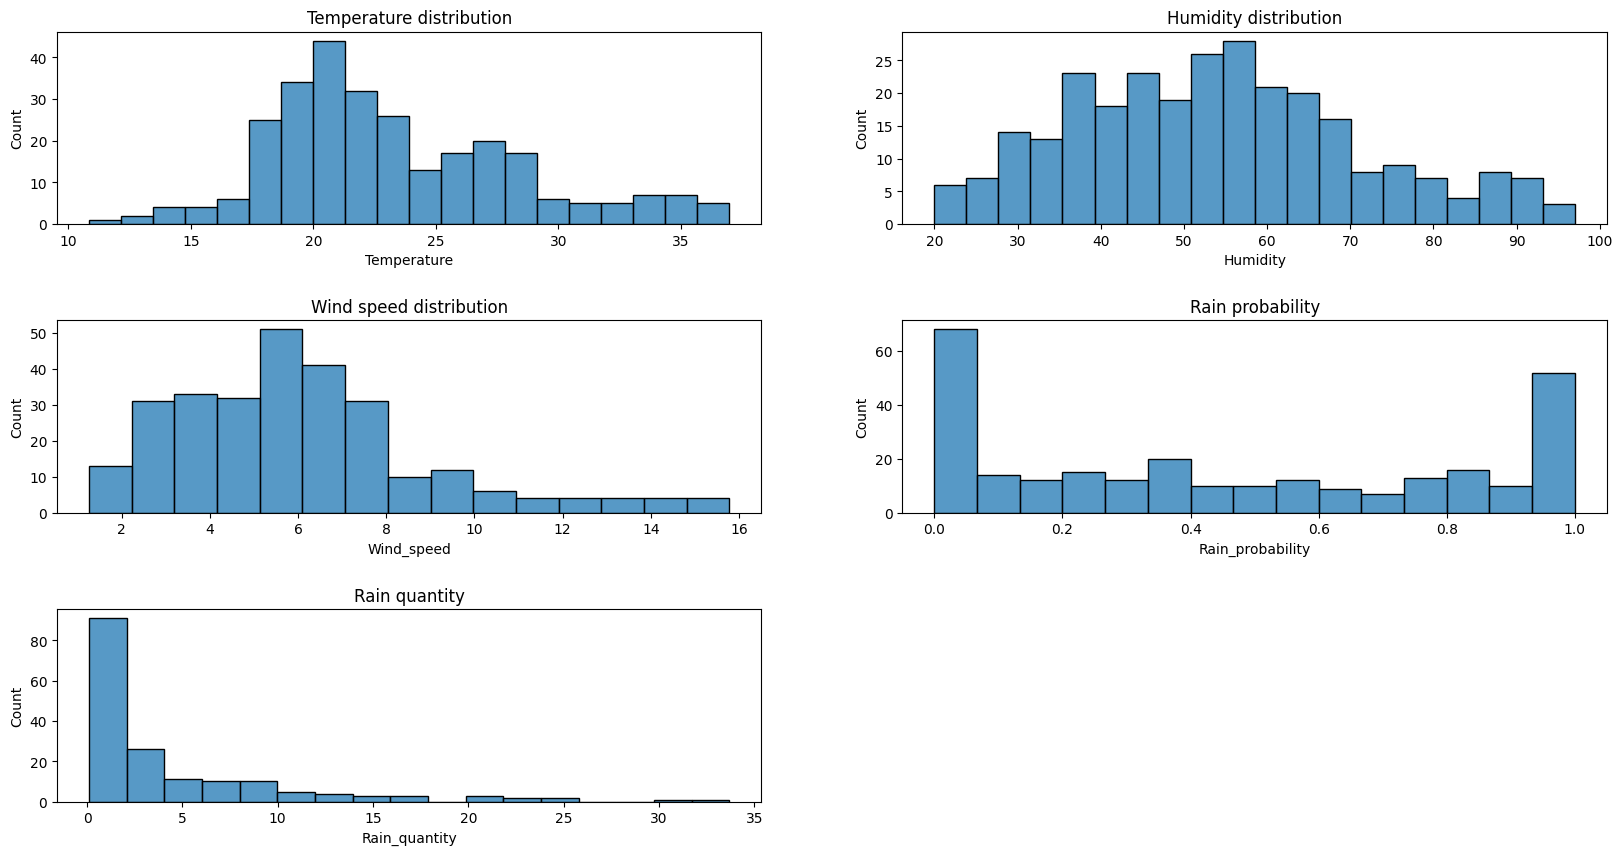

In [13]:
import seaborn as sns

plt.figure(figsize=(20, 10))
plt.subplot(3, 2, 1)
sns.histplot(df_weather, x='Temperature', bins=20)
plt.title('Temperature distribution')

plt.subplot(3, 2, 2)  # 1 ligne, 2 colonnes, sous-graphique 2
sns.histplot(df_weather, x='Humidity', bins=20)
plt.title('Humidity distribution')

plt.subplot(3, 2, 3)
sns.histplot(df_weather, x='Wind_speed', bins=15)
plt.title('Wind speed distribution')

plt.subplot(3, 2 ,4)
sns.histplot(df_weather, x='Rain_probability', bins = 15)
plt.title('Rain probability')

plt.subplot(3, 2 ,5)
sns.histplot(df_weather, x='Rain_quantity')
plt.title('Rain quantity')

# Ajuster les marges et l'espacement
plt.subplots_adjust(hspace=0.5)

plt.show()

Some informations to have a better understanding of the data :

Temperature = celsius

Humidity = Humidity in %

Wind speed = m/s

Rain probability = Probability of precipitation, the value vary between 0 (0%) and 1 (100%)

Rain quantity = Precipitation volume in mm

In [14]:
# Convert wind speed in km/h because I find it's easier to visualise than m/s
df_weather['Wind_speed'] = df_weather['Wind_speed'] * 3.6
df_weather

,Cities,Date,Temperature,Humidity,Wind_speed,Description,Rain_probability,Rain_quantity
0,Mont Saint Michel,2023-08-24 12:00:00,23.07,70,26.604,pluie modérée,0.91,4.60
1,Mont Saint Michel,2023-08-25 12:00:00,19.77,55,22.896,partiellement nuageux,0.00,NaN
2,Mont Saint Michel,2023-08-26 12:00:00,20.09,54,18.612,légère pluie,0.63,3.71
3,Mont Saint Michel,2023-08-27 12:00:00,19.49,62,24.264,légère pluie,0.56,1.93
4,Mont Saint Michel,2023-08-28 12:00:00,19.95,66,21.564,légère pluie,0.30,0.12
...,...,...,...,...,...,...,...,...
275,La Rochelle,2023-08-27 12:00:00,20.39,58,33.228,partiellement nuageux,0.12,NaN
276,La Rochelle,2023-08-28 12:00:00,19.23,64,27.612,nuageux,0.03,NaN
277,La Rochelle,2023-08-29 12:00:00,20.64,69,22.176,légère pluie,0.40,0.58
278,La Rochelle,2023-08-30 12:00:00,18.99,53,27.720,légère pluie,0.56,0.70


In [15]:
cols = ['Temperature', 'Humidity', 'Wind_speed', 'Rain_probability', 'Rain_quantity']

# Calculate the mean weather forecast for each cities
df_mean = df_weather.groupby('Cities')[cols].mean().reset_index()
df_mean

,Cities,Temperature,Humidity,Wind_speed,Rain_probability,Rain_quantity
0,Aigues Mortes,27.34625,45.500,31.8555,0.25875,1.113333
1,Aix en Provence,27.09375,41.250,23.4225,0.35750,7.175000
2,Amiens,20.03000,61.125,20.1915,0.50750,2.062857
3,Annecy,22.03250,64.625,9.3825,0.62625,8.786667
4,Ariege,17.77250,63.250,13.1130,0.53375,7.475000
5,Avignon,28.93875,33.250,32.7195,0.30500,2.460000
6,Bayeux,19.99750,56.750,22.6440,0.50250,1.808000
7,Bayonne,21.99625,66.750,19.2195,0.55500,6.175000
8,Besancon,20.64875,66.500,15.7140,0.64375,5.608333
9,Biarritz,21.19625,69.750,19.3950,0.54875,6.510000


In [16]:
df_mean.columns = df_mean.columns.str.lower()

In [17]:
# Getting lat and lon from the first dataset
weather_data = pd.merge(df_mean, df, on=['cities'], how='inner')
weather_data

,cities,temperature,humidity,wind_speed,rain_probability,rain_quantity,latitude,longitude
0,Aigues Mortes,27.34625,45.500,31.8555,0.25875,1.113333,43.565823,4.191284
1,Aix en Provence,27.09375,41.250,23.4225,0.35750,7.175000,43.529842,5.447474
2,Amiens,20.03000,61.125,20.1915,0.50750,2.062857,49.894171,2.295695
3,Annecy,22.03250,64.625,9.3825,0.62625,8.786667,45.899235,6.128885
4,Ariege,17.77250,63.250,13.1130,0.53375,7.475000,42.945537,1.406554
5,Avignon,28.93875,33.250,32.7195,0.30500,2.460000,43.949249,4.805901
6,Bayeux,19.99750,56.750,22.6440,0.50250,1.808000,49.276462,-0.702474
7,Bayonne,21.99625,66.750,19.2195,0.55500,6.175000,43.494514,-1.473666
8,Besancon,20.64875,66.500,15.7140,0.64375,5.608333,47.238022,6.024362
9,Biarritz,21.19625,69.750,19.3950,0.54875,6.510000,43.471144,-1.552727


In [18]:
#weather_data.to_csv('weather_forecast.csv', index=False)

### What is a good weather ?

For me a good weather is not too cold and not too hot. It is just my opinion but temperatures above 30 are too high so I will keep only cities with an average temperature between 25 and 30°C.

We are in summer so in general we don't want to much rain, I will keep only cities with rain probability between 0 and 0.3. Rain can be good to refresh a little. 

Humidity is considered average between 35 and 65%, above which the air tends to be more stuffy.

In [18]:
weather_data = pd.read_csv('data/weather_forecast.csv')

In [19]:
# Filtered rows with rain_probability between 0 and 0.3
df_filtered = weather_data[(weather_data['rain_probability'] >= 0) & (weather_data['rain_probability'] <= 0.3)]

# Filtered rows with temperature between 25 and 30°C
df_filtered = df_filtered[(df_filtered['temperature'] >= 25) & (df_filtered['temperature'] <= 30)]

# Keeping only rows with less than 65% humidity
df_filtered = df_filtered[(df_filtered['humidity'] < 65)]
df_filtered

,cities,temperature,humidity,wind_speed,rain_probability,rain_quantity,latitude,longitude
0,Aigues Mortes,29.95625,45.125,17.703,0.13625,2.050000,43.565823,4.191284
20,La Rochelle,25.34625,63.000,24.192,0.17000,0.680000,46.159113,-1.152043
22,Lille,25.03000,47.250,14.832,0.29125,1.406667,50.636565,3.063528
24,Marseille,29.93875,46.375,13.329,0.09500,0.325000,43.296174,5.369953
30,Saintes Maries de la mer,28.08625,57.500,18.000,0.09125,1.660000,43.452277,4.428717


These are the top 5 cities for the next 7 days according to the weather forecast

## 3. Hotels

Getting hotels data from booking.com with Scrapy.

In [20]:
hotel_df = pd.read_csv('data/hotel_raw.csv')
hotel_df.head()

,hotel_name,url,coordinates,score,description,city
0,Hôtel du Pont Blanc,/hotel/fr/hotellerie-du-pont-blanc.fr.html?aid...,"43.45705076,4.42464903","9,1","Situé à Saintes-Marie-de-la-Mer, l'Hôtel du Po...","\nChemin du Pont Blanc, 13460 Les Saintes-Mari..."
1,Lodge Sainte Helene,/hotel/fr/lodge-sainte-helene.fr.html?aid=3041...,"43.46575556,4.41393435","9,1",Situé sur la presqu'île d'un lac près des Sain...,"\nChemin Bas des Launes, 13460 Les Saintes-Mar..."
2,Mas de la Fouque - Hôtel & Spa,/hotel/fr/lodge-de-la-fouque.fr.html?aid=30414...,"43.46708060,4.40451175","7,5",Le boutique-hôtel Mas de la Fouque - Hôtel & S...,"\nRoute du Petit Rhône, 13460 Les Saintes-Mari..."
3,Lou Mas Dou Juge,/hotel/fr/lou-mas-dou-juge.fr.html?aid=304142&...,"43.52074387,4.35478628","8,8",Aménagé dans une maison du XVIIIe siècle situé...,"\nRoute de Pin Fourcat, 13460 Les Saintes-Mari..."
4,Cacharel,/hotel/fr/cacharel.fr.html?aid=304142&label=ge...,"43.49245835,4.44407601","8,2",Situé à 5 km du centre de Saintes-Maries-de-la...,"\nRoute de Cacharel, 13460 Les Saintes-Maries-..."


Exploring data

In [21]:
hotel_df['hotel_name'].value_counts()

hotel_name
Les Appartements du Vieux Port               3
New Hotel Le Quai - Vieux Port               3
DOMITYS LA BADIANE                           3
Logis Le Nid du Pont de Gau                  3
Hôtel L' Estelle en Camargue                 3
                                            ..
Hôtel Saint Maurice                          1
L'Hermitage Gantois, Autograph Collection    1
Lille City Hotel                             1
Hotel Kanaï                                  1
Mercure Port La Grande Motte                 1
Name: count, Length: 356, dtype: int64

In [22]:
hotel_df.shape

(411, 6)

In [23]:
hotel_df.isna().sum()

hotel_name     0
url            0
coordinates    0
score          5
description    0
city           0
dtype: int64

In [24]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hotel_name   411 non-null    object
 1   url          411 non-null    object
 2   coordinates  411 non-null    object
 3   score        406 non-null    object
 4   description  411 non-null    object
 5   city         411 non-null    object
dtypes: object(6)
memory usage: 19.4+ KB


### DATA CLEANING

In [25]:
# Checking the look of the description
hotel_df['description'][1]

"Situé sur la presqu'île d'un lac près des Saintes-Maries-de-la-Mer (1,5\xa0km), le Lodge Sainte Helene offre une vue panoramique sur le lac et ses somptueux couchers de soleil. Une connexion Wi-Fi gratuite est disponible. Vous pourrez profiter d'une piscine extérieure chauffée en été, d'un jardin ainsi que d'une terrasse pour vous détendre dans un cadre paisible et très reposant.\n\nLes chambres doubles supérieures disposent d'un balcon donnant sur le lac, d'un minibar, d'une télévision à écran plat et d'une machine à café/thé. Les salles de bains privatives sont pourvues d'une baignoire ou d'une grande douche à l'italienne, d'un sèche-cheveux, d'un peignoir, de chaussons et d'articles de toilette l'Occitane gratuits.\n\nPour bien commencer votre journée, vous pourrez déguster un petit-déjeuner brunch ou buffet en chambre ou dans les parties communes au bord du lac ou sur la terrasse. Des services de repassage et de blanchisserie sont également assurés.\n\nVous pourrez pratiquer plusi

Few undesirable character : "\n" and "1,5\xa0km"

In [26]:
# Deleting spaces and undesirable character
hotel_df['description'] = hotel_df['description'].str.replace('\n', '').str.replace('\xa0',' ')
hotel_df['description'][1]

"Situé sur la presqu'île d'un lac près des Saintes-Maries-de-la-Mer (1,5 km), le Lodge Sainte Helene offre une vue panoramique sur le lac et ses somptueux couchers de soleil. Une connexion Wi-Fi gratuite est disponible. Vous pourrez profiter d'une piscine extérieure chauffée en été, d'un jardin ainsi que d'une terrasse pour vous détendre dans un cadre paisible et très reposant.Les chambres doubles supérieures disposent d'un balcon donnant sur le lac, d'un minibar, d'une télévision à écran plat et d'une machine à café/thé. Les salles de bains privatives sont pourvues d'une baignoire ou d'une grande douche à l'italienne, d'un sèche-cheveux, d'un peignoir, de chaussons et d'articles de toilette l'Occitane gratuits.Pour bien commencer votre journée, vous pourrez déguster un petit-déjeuner brunch ou buffet en chambre ou dans les parties communes au bord du lac ou sur la terrasse. Des services de repassage et de blanchisserie sont également assurés.Vous pourrez pratiquer plusieurs activités 

In [27]:
print(len(hotel_df['city']))
print(len(hotel_df['city'].unique()))

411
345


We have 66 hotels with exactly the same address

In [28]:
# Deleting duplicates addresses
hotel_df = hotel_df.drop_duplicates(subset='city', keep='first')
hotel_df.shape

(345, 6)

In [29]:
hotel_df['city'] = hotel_df['city'].str.replace('\n', '')

# Renaming "city" column
hotel_df = hotel_df.rename(columns={'city' : 'address'})
hotel_df.head()

,hotel_name,url,coordinates,score,description,address
0,Hôtel du Pont Blanc,/hotel/fr/hotellerie-du-pont-blanc.fr.html?aid...,"43.45705076,4.42464903","9,1","Situé à Saintes-Marie-de-la-Mer, l'Hôtel du Po...","Chemin du Pont Blanc, 13460 Les Saintes-Maries..."
1,Lodge Sainte Helene,/hotel/fr/lodge-sainte-helene.fr.html?aid=3041...,"43.46575556,4.41393435","9,1",Situé sur la presqu'île d'un lac près des Sain...,"Chemin Bas des Launes, 13460 Les Saintes-Marie..."
2,Mas de la Fouque - Hôtel & Spa,/hotel/fr/lodge-de-la-fouque.fr.html?aid=30414...,"43.46708060,4.40451175","7,5",Le boutique-hôtel Mas de la Fouque - Hôtel & S...,"Route du Petit Rhône, 13460 Les Saintes-Maries..."
3,Lou Mas Dou Juge,/hotel/fr/lou-mas-dou-juge.fr.html?aid=304142&...,"43.52074387,4.35478628","8,8",Aménagé dans une maison du XVIIIe siècle situé...,"Route de Pin Fourcat, 13460 Les Saintes-Maries..."
4,Cacharel,/hotel/fr/cacharel.fr.html?aid=304142&label=ge...,"43.49245835,4.44407601","8,2",Situé à 5 km du centre de Saintes-Maries-de-la...,"Route de Cacharel, 13460 Les Saintes-Maries-de..."


In [30]:
# Convert "score" column in float
hotel_df['score'] = hotel_df['score'].str.replace(',','.').astype(float)

# Splitting "coordinates" column in two columns with latitude and longitude + convert to float
hotel_df[['latitude', 'longitude']] = hotel_df['coordinates'].str.split(',', expand=True).astype(float)

#Removing "coordinates column"
hotel_df.drop(['coordinates'], axis=1, inplace=True)

hotel_df

,hotel_name,url,score,description,address,latitude,longitude
0,Hôtel du Pont Blanc,/hotel/fr/hotellerie-du-pont-blanc.fr.html?aid...,9.1,"Situé à Saintes-Marie-de-la-Mer, l'Hôtel du Po...","Chemin du Pont Blanc, 13460 Les Saintes-Maries...",43.457051,4.424649
1,Lodge Sainte Helene,/hotel/fr/lodge-sainte-helene.fr.html?aid=3041...,9.1,Situé sur la presqu'île d'un lac près des Sain...,"Chemin Bas des Launes, 13460 Les Saintes-Marie...",43.465756,4.413934
2,Mas de la Fouque - Hôtel & Spa,/hotel/fr/lodge-de-la-fouque.fr.html?aid=30414...,7.5,Le boutique-hôtel Mas de la Fouque - Hôtel & S...,"Route du Petit Rhône, 13460 Les Saintes-Maries...",43.467081,4.404512
3,Lou Mas Dou Juge,/hotel/fr/lou-mas-dou-juge.fr.html?aid=304142&...,8.8,Aménagé dans une maison du XVIIIe siècle situé...,"Route de Pin Fourcat, 13460 Les Saintes-Maries...",43.520744,4.354786
4,Cacharel,/hotel/fr/cacharel.fr.html?aid=304142&label=ge...,8.2,Situé à 5 km du centre de Saintes-Maries-de-la...,"Route de Cacharel, 13460 Les Saintes-Maries-de...",43.492458,4.444076
...,...,...,...,...,...,...,...
403,MY HOTEL Residence - A005,/hotel/fr/my-residence-a005-la-grande-motte.fr...,10.0,"Situé à 200 mètres de la plage de Couchant, le...","Allée d'Athènes, Uniquement, 74, 34280 La Gran...",43.559329,4.069145
407,Résidence Coté Mer,/hotel/fr/ra-c-sidence-cota-c-mer.fr.html?aid=...,8.3,Située sur la plage du Couchant à La Grande-Mo...,"Esplanade Jean Baumel, 34280 La Grande Motte, ...",43.557611,4.077884
408,Hotel Restaurant La Ceinture,/hotel/fr/restaurant-la-ceinture.fr.html?aid=3...,7.1,"Situé à Montcalm, à 34 km de la salle omnispor...","Route Des Saintes Maries De La Mer, 30600 Mont...",43.572342,4.306694
409,"Hôtel Saint-Clair, côté Plage",/hotel/fr/saint-clair-la-grande-motte.fr.html?...,8.6,"L'Hôtel Saint-Clair, côté Plage est situé à La...","Avenue de l'Europe, 34280 La Grande Motte, France",43.557043,4.091806


In [31]:
# Removing rows with missing values (missing score)
hotel_df = hotel_df.dropna()

In [32]:
hotel_df['address']

0      Chemin du Pont Blanc, 13460 Les Saintes-Maries...
1      Chemin Bas des Launes, 13460 Les Saintes-Marie...
2      Route du Petit Rhône, 13460 Les Saintes-Maries...
3      Route de Pin Fourcat, 13460 Les Saintes-Maries...
4      Route de Cacharel, 13460 Les Saintes-Maries-de...
                             ...                        
403    Allée d'Athènes, Uniquement, 74, 34280 La Gran...
407    Esplanade Jean Baumel, 34280 La Grande Motte, ...
408    Route Des Saintes Maries De La Mer, 30600 Mont...
409    Avenue de l'Europe, 34280 La Grande Motte, France
410      140, Rue Du Port, 34280 La Grande Motte, France
Name: address, Length: 343, dtype: object

In [33]:
# Function to get the city from the address
def get_city_name(address):
    city = address.split(",")[-2]
    return city

# Applying function
hotel_df['cities'] = hotel_df['address'].apply(get_city_name)

# Removing postal code
hotel_df['cities'] = hotel_df['cities'].apply(lambda x: ''.join(filter(lambda y: not y.isdigit(), x)))

hotel_df


/var/folders/1w/kcwg_s2s1lbg5z722b6bjbk80000gn/T/ipykernel_2956/678087010.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['cities'] = hotel_df['address'].apply(get_city_name)
/var/folders/1w/kcwg_s2s1lbg5z722b6bjbk80000gn/T/ipykernel_2956/678087010.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['cities'] = hotel_df['cities'].apply(lambda x: ''.join(filter(lambda y: not y.isdigit(), x)))


,hotel_name,url,score,description,address,latitude,longitude,cities
0,Hôtel du Pont Blanc,/hotel/fr/hotellerie-du-pont-blanc.fr.html?aid...,9.1,"Situé à Saintes-Marie-de-la-Mer, l'Hôtel du Po...","Chemin du Pont Blanc, 13460 Les Saintes-Maries...",43.457051,4.424649,Les Saintes-Maries-de-la-Mer
1,Lodge Sainte Helene,/hotel/fr/lodge-sainte-helene.fr.html?aid=3041...,9.1,Situé sur la presqu'île d'un lac près des Sain...,"Chemin Bas des Launes, 13460 Les Saintes-Marie...",43.465756,4.413934,Les Saintes-Maries-de-la-Mer
2,Mas de la Fouque - Hôtel & Spa,/hotel/fr/lodge-de-la-fouque.fr.html?aid=30414...,7.5,Le boutique-hôtel Mas de la Fouque - Hôtel & S...,"Route du Petit Rhône, 13460 Les Saintes-Maries...",43.467081,4.404512,Les Saintes-Maries-de-la-Mer
3,Lou Mas Dou Juge,/hotel/fr/lou-mas-dou-juge.fr.html?aid=304142&...,8.8,Aménagé dans une maison du XVIIIe siècle situé...,"Route de Pin Fourcat, 13460 Les Saintes-Maries...",43.520744,4.354786,Les Saintes-Maries-de-la-Mer
4,Cacharel,/hotel/fr/cacharel.fr.html?aid=304142&label=ge...,8.2,Situé à 5 km du centre de Saintes-Maries-de-la...,"Route de Cacharel, 13460 Les Saintes-Maries-de...",43.492458,4.444076,Les Saintes-Maries-de-la-Mer
...,...,...,...,...,...,...,...,...
403,MY HOTEL Residence - A005,/hotel/fr/my-residence-a005-la-grande-motte.fr...,10.0,"Situé à 200 mètres de la plage de Couchant, le...","Allée d'Athènes, Uniquement, 74, 34280 La Gran...",43.559329,4.069145,La Grande Motte
407,Résidence Coté Mer,/hotel/fr/ra-c-sidence-cota-c-mer.fr.html?aid=...,8.3,Située sur la plage du Couchant à La Grande-Mo...,"Esplanade Jean Baumel, 34280 La Grande Motte, ...",43.557611,4.077884,La Grande Motte
408,Hotel Restaurant La Ceinture,/hotel/fr/restaurant-la-ceinture.fr.html?aid=3...,7.1,"Situé à Montcalm, à 34 km de la salle omnispor...","Route Des Saintes Maries De La Mer, 30600 Mont...",43.572342,4.306694,Montcalm
409,"Hôtel Saint-Clair, côté Plage",/hotel/fr/saint-clair-la-grande-motte.fr.html?...,8.6,"L'Hôtel Saint-Clair, côté Plage est situé à La...","Avenue de l'Europe, 34280 La Grande Motte, France",43.557043,4.091806,La Grande Motte


In [35]:
#hotel_df.to_csv('hotel_clean.csv', index=False)

## 4. Storage

In [ ]:
import boto3

# Create a bucket on amazon S3 to store the data
session = boto3.Session(
    aws_access_key_id= "********",
    aws_secret_access_key= "*********"
)

s3 = session.resource("s3")

bucketname = 'bucketchey-jedha'
bucket = s3.create_bucket(Bucket=bucketname, ACL = 'private', CreateBucketConfiguration={'LocationConstraint': "eu-west-3"})

In [ ]:
s3.Bucket(bucketname).upload_file('data/hotel_clean.csv', 'hotel_data.csv')
s3.Bucket(bucketname).upload_file('data/weather_forecast.csv', 'weather_data.csv')

In [43]:
from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker

dbhost = "****"
dbuser = "******"
dbpass = "*********"
dbname = "*****"
port = "****"

engine = create_engine(f"postgresql+psycopg2://{dbuser}:{dbpass}@{dbhost}/{dbname}")
Session = sessionmaker(bind=engine)
session = Session()

In [44]:
# storing weather & hotel dataframes as SQL tables
weather_data.to_sql('weather_data', con=engine, if_exists='replace', index=False)
hotel_df.to_sql('hotel_data', con=engine, if_exists='replace', index=False)

343

In [53]:
# Filtered rows to get the best destinations for the next 7 days
top_weather = text('SELECT * FROM weather_data WHERE temperature >= 25 AND temperature <= 30 AND rain_probability >= 0 AND rain_probability <= 0.3 AND humidity < 65;')

top_cities = pd.read_sql(top_weather, engine)
top_cities

,cities,temperature,humidity,wind_speed,rain_probability,rain_quantity,latitude,longitude
0,Aigues Mortes,29.95625,45.125,17.703,0.13625,2.050000,43.565823,4.191284
1,La Rochelle,25.34625,63.000,24.192,0.17000,0.680000,46.159113,-1.152043
2,Lille,25.03000,47.250,14.832,0.29125,1.406667,50.636565,3.063528
3,Marseille,29.93875,46.375,13.329,0.09500,0.325000,43.296174,5.369953
4,Saintes Maries de la mer,28.08625,57.500,18.000,0.09125,1.660000,43.452277,4.428717


In [56]:
hotel = text('SELECT * FROM hotel_data WHERE score > 8.7;')

top_hotel = pd.read_sql(hotel, engine)
top_hotel.head()

,hotel_name,url,score,description,address,latitude,longitude,cities
0,Hôtel du Pont Blanc,/hotel/fr/hotellerie-du-pont-blanc.fr.html?aid...,9.1,"Situé à Saintes-Marie-de-la-Mer, l'Hôtel du Po...","Chemin du Pont Blanc, 13460 Les Saintes-Maries...",43.457051,4.424649,Les Saintes-Maries-de-la-Mer
1,Lodge Sainte Helene,/hotel/fr/lodge-sainte-helene.fr.html?aid=3041...,9.1,Situé sur la presqu'île d'un lac près des Sain...,"Chemin Bas des Launes, 13460 Les Saintes-Marie...",43.465756,4.413934,Les Saintes-Maries-de-la-Mer
2,Lou Mas Dou Juge,/hotel/fr/lou-mas-dou-juge.fr.html?aid=304142&...,8.8,Aménagé dans une maison du XVIIIe siècle situé...,"Route de Pin Fourcat, 13460 Les Saintes-Maries...",43.520744,4.354786,Les Saintes-Maries-de-la-Mer
3,Aparthotel Adagio Lille Centre Grand Place,/hotel/fr/aparthotel-adagio-lille-centre-grand...,8.9,Situé à moins de 700 mètres du centre de Lille...,"76 Rue De L Hopital Militaire, Centre de Lille...",50.635281,3.060162,Lille
4,Au Moulin d'Or,/hotel/fr/au-moulin-d-39-or.fr.html?aid=304142...,9.1,Doté d'un salon commun et d'une connexion Wi-F...,"3 17 Rue du Molinel, Centre de Lille, 59800 Li...",50.635270,3.069822,Lille


## 5. DATA VISUALIZATION

a. Top 5 destinations by weather

In [ ]:
# Coordonnées du centre de la France
latitude_centre = 46.603354
longitude_centre = 1.888334

fig = px.scatter_mapbox(
    top_cities,
    lat='latitude',
    lon='longitude',
    color='temperature',
    size='temperature',
    zoom=5,
    center={'lat': latitude_centre, 'lon': longitude_centre},
    height=600
)

# Personnalisez la mise en page de la carte
fig.update_layout(
    mapbox_style="carto-positron",
    title="TOP 5 destinations for next 7 days",
    margin={"r":0,"t":30,"l":0,"b":0},
)

# Affichez la carte
fig.show()

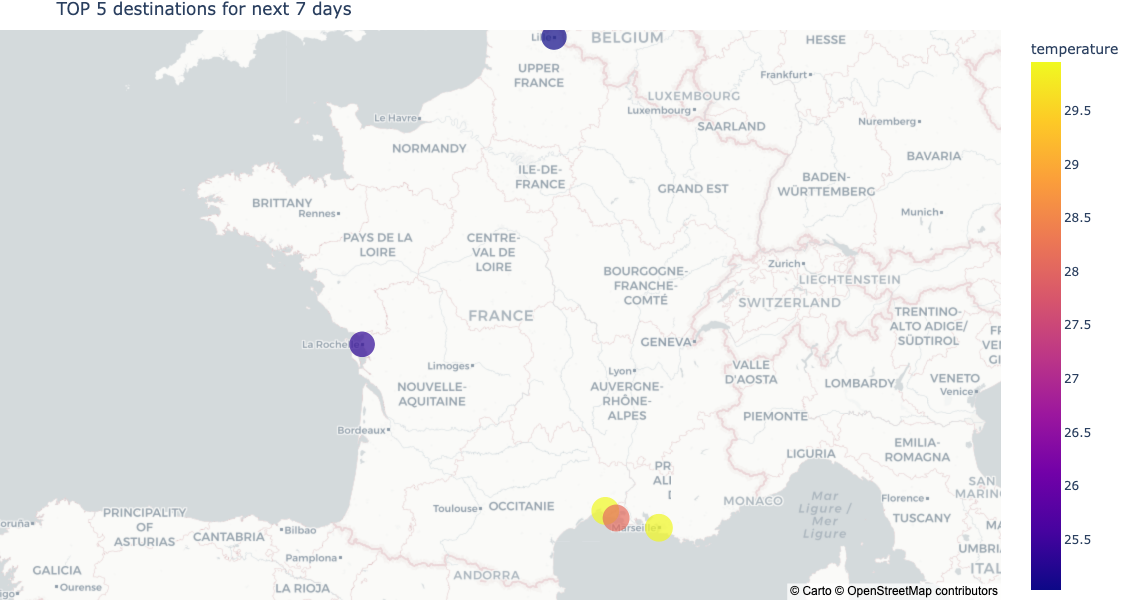

b. top hotel for the top 5 destinations

In [ ]:
# Coordonnées du centre de la France
latitude_centre = 46.603354
longitude_centre = 1.888334

fig = px.scatter_mapbox(
    top_hotel,
    lat='latitude',
    lon='longitude',
    color='score',
    size='score',
    zoom=5,
    center={'lat': latitude_centre, 'lon': longitude_centre},
    height=800
)

# Personnalisez la mise en page de la carte
fig.update_layout(
    mapbox_style="carto-positron",
    title="Best hotels in the top 5 cities",
    margin={"r":0,"t":30,"l":0,"b":0},
)

# Affichez la carte
fig.show()

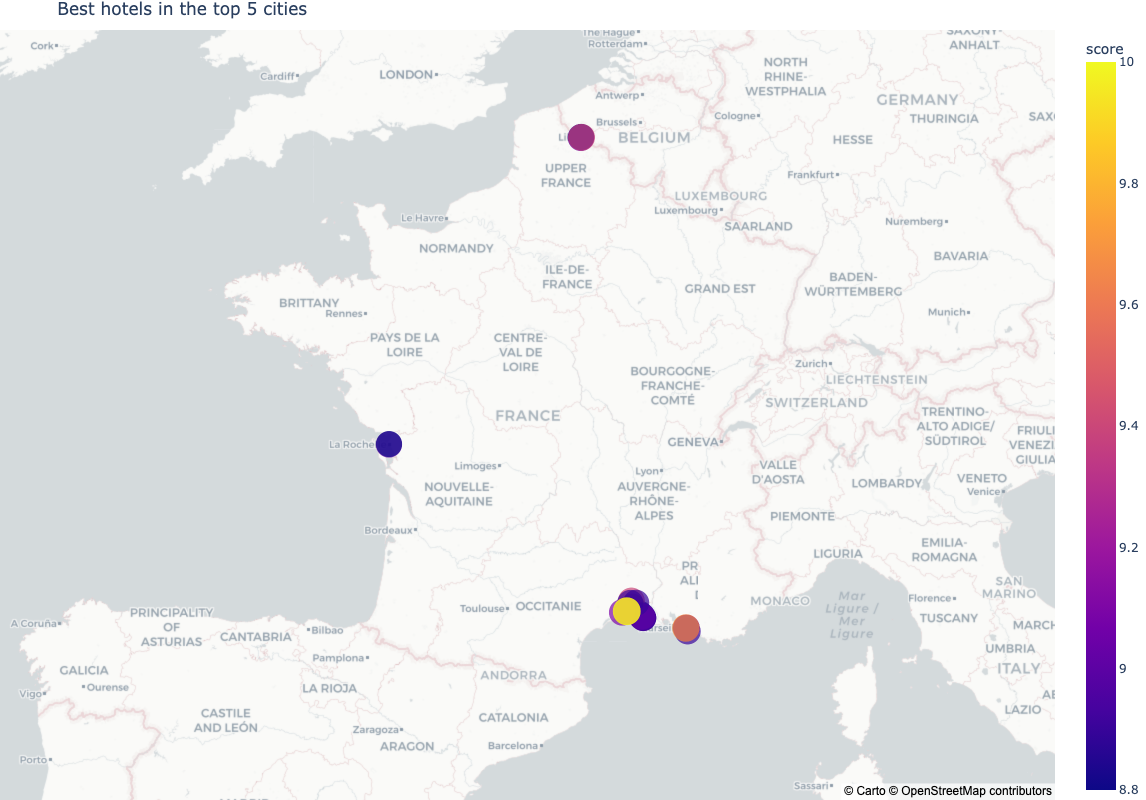